# Dielectric Response due to waves

We have managed to find analytical expressions of the wave pulse from the muon as transient functions of pressure over position inside a liquid. Now we need to care a bit to see how we can detect it. For the moment let's derive a simplistic model for the current induced due to the sound wave changing the polarization of the liquid. To do this we assume that we are in the linear dielectric regime, hence the polarisation of the non-polar material will be given by:

$$ |\vec{p}| = \alpha \varepsilon_0 |\vec{E}|$$

Where $\alpha$ is the polarizability of the material, $\vec{p}$ is the induced dipole moment of the single molecule, and $\vec{E}$ is the external electric field.

Now we can calculate the total polarisation like so:

$$P = n p = n \alpha \varepsilon_0 |\vec{E}|$$

Where $n$ is the volume density of polarised particles defined like so:

$$n = \frac{\rho}{m_{p}}$$

Therefore, we can now think of the setup where we have a parallel plate capacitor with a liquid dielectric in between. Doing the math we will see that in the presence of the dielectric, the charge of the capacitor can be given by:

$$Q = \kappa Q_0$$

where $Q_0$ is the charge in the vaccuum capactitor, and $\kappa$ is defined like so:

$$ \kappa - 1 = \frac{P}{\varepsilon_0 E} = \frac{n \alpha}{1-\frac{n \alpha}{3}} = \frac{\rho \alpha}{m_p - \frac{\rho \alpha}{3}}$$

Now we can estimate the current needed to be supplied as a function of density of the dielectric.

$$I = \frac{d Q}{dt} = Q_0 \frac{\partial }{\partial t} \left\{\frac{\rho \alpha}{m_p - \frac{\rho \alpha}{3}} \right\} = \frac{\varepsilon_0 A V}{h} \left[ \frac{K^2}{\alpha \gamma} - \frac{P}{3 m_p} \right]^{-1} \frac{\partial P}{\partial t}$$

And now the only thing we need to do is to estimate.

# Experiments in Water and polar solvents

Because water has some intrinsic polarization we need to take more things into account. To do this we introduce the following correction to the current, that is derived from a statistical mechanics approach through the hamooltonian of the dipole $p_0$ in the presence of an external electric field. 

$$I = \frac{\varepsilon_0 A V}{h} \left[ \frac{p_0^2 \gamma}{3\varepsilon_0 m_e kT K^2} + \left(\frac{K^2}{\alpha \gamma} - \frac{P}{3 m_p} \right)^{-1}\right] \frac{\partial P}{\partial t}$$

Now we can predict the results of our experiment with the parallel plate capacitor in the lab.

## Water Waves

Assuming plane water waves, we can express the pressure analytically through the following relation:

$$P(\vec{x},t) = P_{max} \sin(kx - \omega t)$$

In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from tqdm import tqdm

# Define necessary constants (SI)
A       = 1
V       = 1
C       = 1
h       = 1
p_0     = 1
T       = 1
gamma   = 1
K       = 1
alpha   = 1
m_p     = 1
p_max   = 1
k       = 1
w       = 1

# Funtions to generate data

def I(p,p_t,K=K,alpha=alpha,m_p=m_p,gamma=gamma,C=C):
    return V*C*p_t/(K**2/(alpha*gamma) - p/(3*m_p))

def I_water(p,p_t,K=K,alpha=alpha,m_p=m_p,gamma=gamma,C=C,p_0=p_0,T=T):
    return V*C*p_t*( p_0**2*gamma/(3*const.epsilon0*const.electron_mass*const.k*T*K**2) + (K**2/(alpha*gamma) - p/(3*m_p))**(-1))

def p(t,k=k,w=w,p_max=A,h=h):
    return A/(h*k) * (np.cos(k*h-w*t) - np.cos(w*t))

def p_t(t,k=k,w=w,p_max=A,h=h):
    return A*w/(h*k)*(np.sin(k*h-w*t)-np.sin(w*t))

Text(0, 0.5, '$I\\ [A]$')

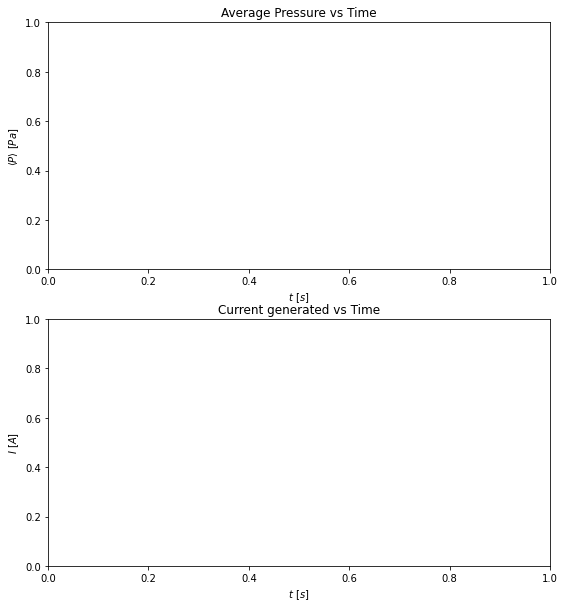

In [22]:
# Plot the current as a fuction of pressure
# Set up plot

fig = plt.figure(figsize=(9,10))
ax1 = fig.add_subplot(211)
ax1.set_title('Average Pressure vs Time')
ax1.set_xlabel(r'$t\ [s]$')
ax1.set_ylabel(r'$\langle P\rangle\ [Pa]$')

ax2 = fig.add_subplot(212)
ax2.set_title('Current generated vs Time')
ax2.set_xlabel(r'$t\ [s]$')
ax2.set_ylabel(r'$I\ [A]$')


# Get datasets
t_min = 0
t_max = 1
Npts = 1000

t   = np.linspace(t_min,t_max,Npts)
P   = p(t)
P_t = p_t(t)

i = I_water(p,p_t)